Importing Libraries


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('car data.csv')

Data Preprocessing

In [ ]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
data.shape

(301, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
date_time= datetime.datetime.now()


In [ ]:
data['Age']= date_time.year - data['Year']

Here 2023- data(Age) and drop the year column

In [ ]:
data.drop('Year',axis=1,inplace=True)
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


Outlier Removal

Seaborn is used for statistical graphics in python.<br>It provides more graphical representation eg. Pair plot, heat map, Distribution plot

<Axes: >

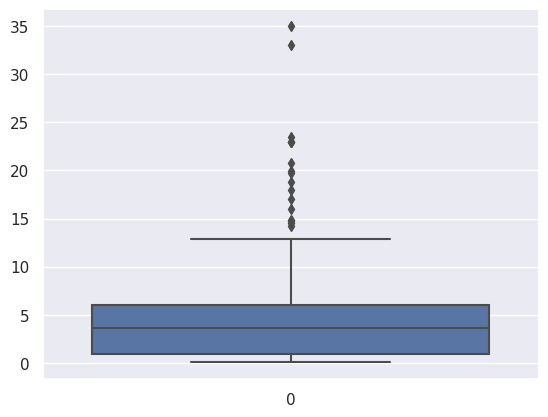

In [ ]:
import seaborn as sns
sns.boxplot(data['Selling_Price'])


In [ ]:
sorted(data['Selling_Price'],reverse=True)


[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [ ]:
data = data[~(data['Selling_Price']>=33.0) & (data['Selling_Price']<=35.0)]
data.shape

(299, 9)

Encoding the Categorical Columns

In [ ]:
data.head(1)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9


In [ ]:
data['Fuel_Type'] = data['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})
data['Seller_Type'] = data['Seller_Type'].map({'Dealer':0,'Individual':1})
data['Transmission'] =data['Transmission'].map({'Manual':0,'Automatic':1})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Selling_Price  299 non-null    float64
 2   Present_Price  299 non-null    float64
 3   Kms_Driven     299 non-null    int64  
 4   Fuel_Type      299 non-null    int64  
 5   Seller_Type    299 non-null    int64  
 6   Transmission   299 non-null    int64  
 7   Owner          299 non-null    int64  
 8   Age            299 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 23.4+ KB


In [ ]:
data.head()


,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,9
1,sx4,4.75,9.54,43000,1,0,0,0,10
2,ciaz,7.25,9.85,6900,0,0,0,0,6
3,wagon r,2.85,4.15,5200,0,0,0,0,12
4,swift,4.60,6.87,42450,1,0,0,0,9


Training and Testing of data

In [ ]:
X = data.drop(['Car_Name','Selling_Price'],axis=1) #asis=1 for column and axis=0 for row
y = data['Selling_Price']

In [ ]:
X


,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,5.59,27000,0,0,0,0,9
1,9.54,43000,1,0,0,0,10
2,9.85,6900,0,0,0,0,6
3,4.15,5200,0,0,0,0,12
4,6.87,42450,1,0,0,0,9
...,...,...,...,...,...,...,...
296,11.60,33988,1,0,0,0,7
297,5.90,60000,0,0,0,0,8
298,11.00,87934,0,0,0,0,14
299,12.50,9000,1,0,0,0,6


In [ ]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42) #20% for testing


Regression:A regression problem is when the output variable is a real or continuous value, such as “salary” or “weight”. Many different models can be used, the simplest is the linear regression. It tries to fit data with the best hyper-plane which goes through the points.The difference between the two tasks is the fact that the dependent attribute is numerical for regression and categorical for classification.

Model Training

LR: It builds the realtionship between dependent and independent variable X is independent and y is dependent variable <br>
R-squared error: R-squared is a statistical method that determines the goodness of fit.<br>
It measures the strength of the relationship between the dependent and independent variables on a scale of 0-100%.
The high value of R-square determines the less difference between the predicted values and actual values and hence represents a good model.

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

RF: It  uses the multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging.

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

GBR:In Gradient Boosting Regressor, the algorithm starts by creating a simple model, such as a decision tree, to make predictions on the data. It then calculates the difference between the actual output and the predicted output, known as the residual error. The algorithm then fits a new model to the residual error and adds the predictions from this new model to the predictions made by the previous model. This process is repeated for a specified number of iterations or until the error cannot be further reduced.
<br>
Gradient Boosting Regressor is a powerful algorithm that can handle complex non-linear relationships between the input features and the target variable. It is commonly used in predictive modeling for problems such as forecasting, prediction of sales, and stock prices, among others.

In [ ]:
xgb = GradientBoostingRegressor()
xgb.fit(X_train,y_train)

GradientBoostingRegressor()

XGBR:Like other gradient boosting algorithms, XGBRegressor works by iteratively adding weak learners to a model, with each new learner attempting to correct the errors of the previous learners. However, XGBRegressor also incorporates several advanced techniques that help to improve its performance, including regularization, tree pruning, and parallel processing.<br>

One of the key advantages of XGBRegressor is its speed and scalability. It can handle large datasets with many features and observations, and it can run on both CPU and GPU hardware. It also provides several tuning parameters that allow users to customize the algorithm to their specific needs.

In [ ]:
xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Prediction on Test Data

In [ ]:
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = xgb.predict(X_test)
y_pred4 = xg.predict(X_test)

13. Evaluating the Algorithm

In [ ]:
from sklearn import metrics
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)
print(score1,score2,score3,score4)


0.6790884983129405 0.7344518425768956 0.8667197781971151 0.8864839405756888


In [ ]:
final_data = pd.DataFrame({'Models':['LR','RF','GBR','XG'],
             "R2_SCORE":[score1,score2,score3,score4]})
final_data

,Models,R2_SCORE
0,LR,0.679088
1,RF,0.734452
2,GBR,0.866720
3,XG,0.886484


<Axes: xlabel='Models', ylabel='R2_SCORE'>

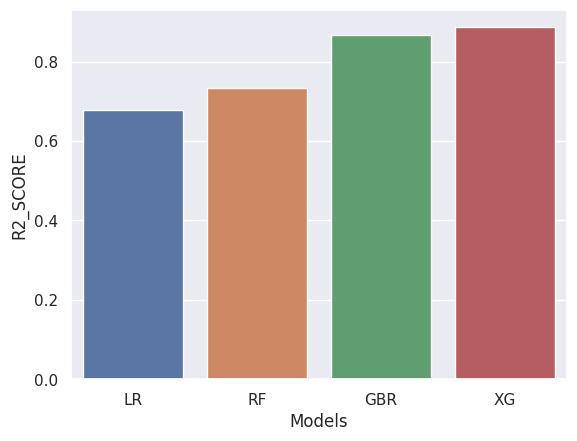

In [ ]:
sns.barplot(x=final_data['Models'], y=final_data['R2_SCORE'], alpha=1)


Save The Model

In [ ]:
xg = XGBRegressor()
xg_final = xg.fit(X,y)
import joblib

joblib is alternative tool to pickle that we can use to save our models. Joblib is faster in saving large numpy arrays, whereas pickle is faster with large collection of python projects.

In [ ]:
joblib.dump(xg_final,'car_price_predictor')

['car_price_predictor']

In [ ]:
model = joblib.load('car_price_predictor')

15. Prediction on New Data

In [ ]:
data_new = pd.DataFrame({
    'Present_Price':4.15,
    'Kms_Driven':5200,
    'Fuel_Type':0,
    'Seller_Type':0,
    'Transmission':0,
    'Owner':0,
    'Age':12
},index=[0])

model.predict(data_new)

array([2.8522067], dtype=float32)